<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rainfall          10 non-null     int64  
 1   Temperature       10 non-null     int64  
 2   Soil Quality      10 non-null     int64  
 3   Fertilizer Usage  10 non-null     int64  
 4   Crop Yield        10 non-null     float64
dtypes: float64(1), int64(4)
memory usage: 528.0 bytes
None


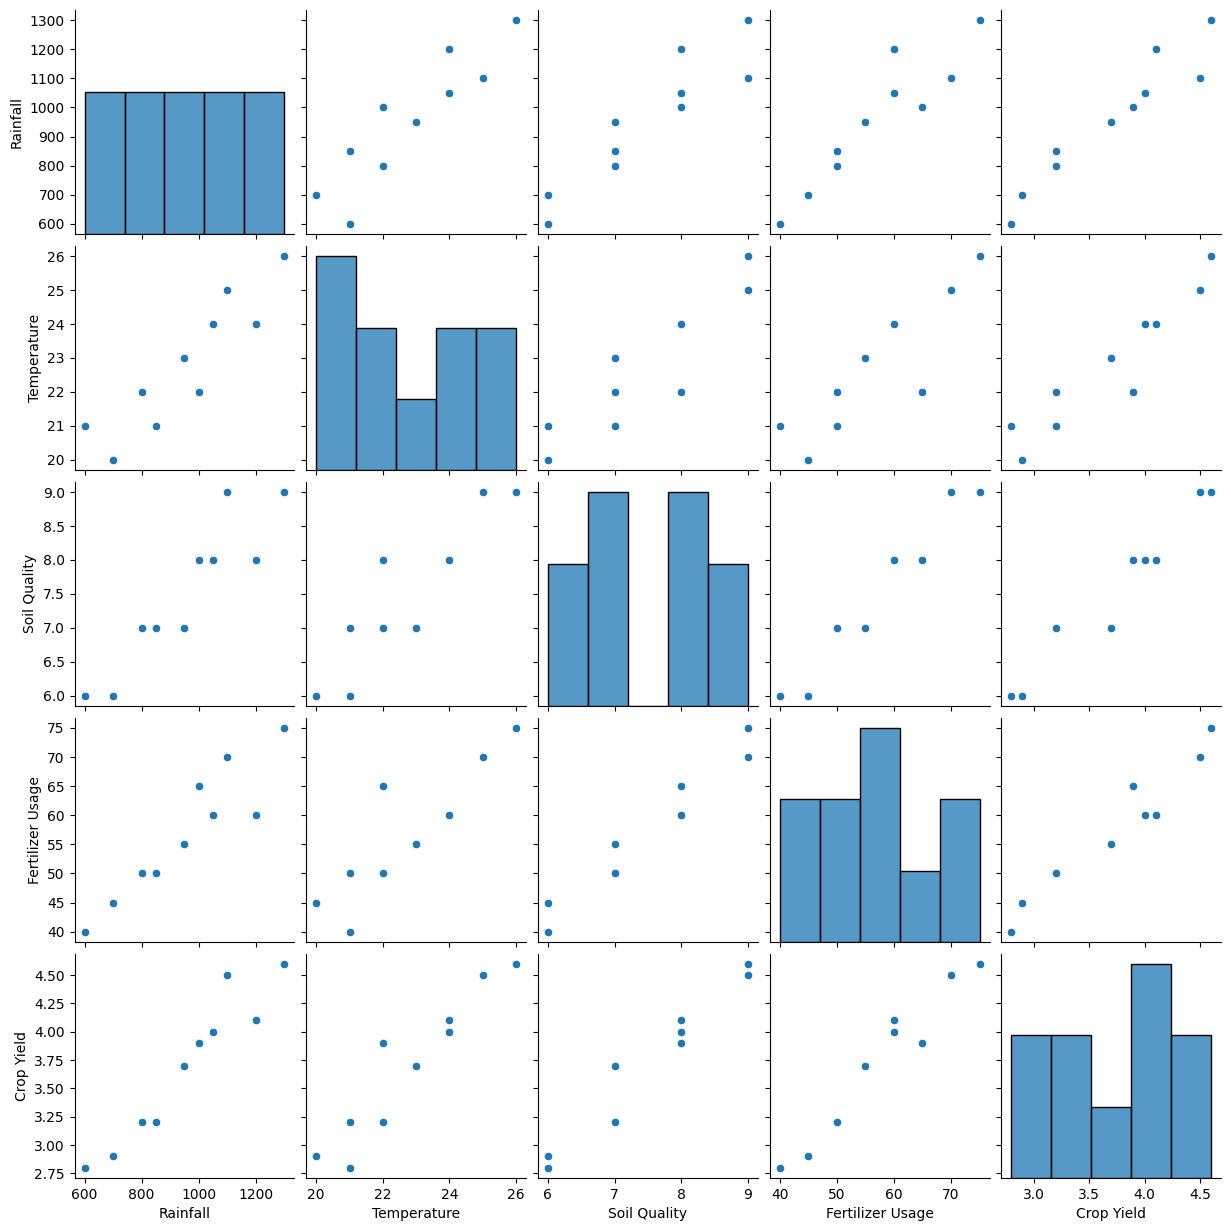

Model Performance:
Mean Squared Error: 0.01
Mean Absolute Error: 0.09
R-squared: 0.95
Regression Coefficients: [0.00015789 0.09649123 0.06535088 0.03166667]
Intercept: -0.9662280701754415


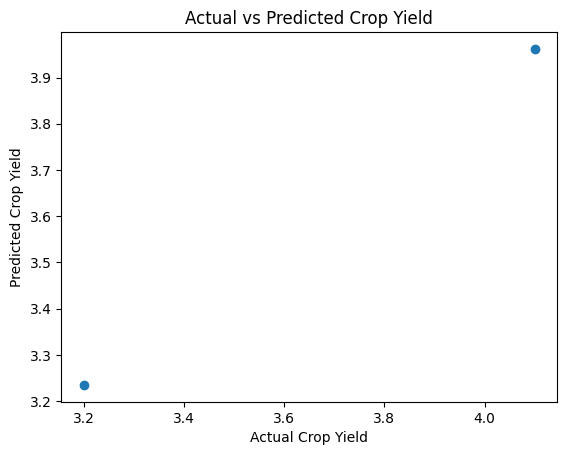

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = {
    "Rainfall": [800, 1200, 600, 1100, 950, 700, 1300, 1000, 850, 1050],
    "Temperature": [22, 24, 21, 25, 23, 20, 26, 22, 21, 24],
    "Soil Quality": [7, 8, 6, 9, 7, 6, 9, 8, 7, 8],
    "Fertilizer Usage": [50, 60, 40, 70, 55, 45, 75, 65, 50, 60],
    "Crop Yield": [3.2, 4.1, 2.8, 4.5, 3.7, 2.9, 4.6, 3.9, 3.2, 4.0]
}

df = pd.DataFrame(data)

print(df.info())

sns.pairplot(df)
plt.show()

X = df[['Rainfall', 'Temperature', 'Soil Quality', 'Fertilizer Usage']]
y = df['Crop Yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

print("Regression Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Crop Yield")
plt.ylabel("Predicted Crop Yield")
plt.title("Actual vs Predicted Crop Yield")
plt.show()
